In [20]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# read data from csv 
data = pd.read_csv('data.csv')

In [3]:
data


,qs1,qs2,qs3,qs4,qs5,merge1,partition_sort
0,0.012239,0.028242,0.025211,0.165049,0.088542,0.085714,0.043208
1,0.007910,0.024616,0.025922,0.158215,0.082935,0.085167,0.042847
2,0.007956,0.025113,0.024541,0.159578,0.086219,0.089888,0.045437
3,0.008413,0.030145,0.026881,0.160898,0.087527,0.087367,0.043932
4,0.008532,0.025889,0.023769,0.163099,0.088294,0.085782,0.043838
...,...,...,...,...,...,...,...
95,0.009435,0.030847,0.027196,0.172949,0.090339,0.095188,0.047359
96,0.009304,0.028665,0.028282,0.172231,0.090032,0.089622,0.045465
97,0.008084,0.027142,0.026661,0.196759,0.097601,0.092756,0.045011
98,0.007974,0.025888,0.025221,0.170694,0.092343,0.090164,0.049470


In [11]:
# do a avova test: to determine if the means of any of the groups differ
anova = stats.f_oneway(data['qs1'], data['qs2'], data['qs3'], data['qs4'], data['qs5'], data['merge1'], data['partition_sort'])
print('ANOVA p-value:', anova.pvalue)
# ANOVA pvalue: 0.0 < 0.05, we can conclude that means amoung the distinct sorting algorithms differ

ANOVA p-value: 0.0


In [22]:
# if you get significance in an ANOVA
# do a post hoc tesh: do pairwise comparisons between each variable
data_melt = pd.melt(data)
posthoc = pairwise_tukeyhsd(
    data_melt['value'], data_melt['variable'],
    alpha=0.05)
print(posthoc)
# POST HOC analysis: looking at the results we can conclude that 'qs1' is the fastest 
#                   and we reject two pair-gorups, i.e., pair 'merge1' & 'qs5' and pair 'qs2' & 'qs3' (can not be distinguished)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------
        merge1 partition_sort   -0.045 0.001  -0.047  -0.043   True
        merge1            qs1  -0.0824 0.001 -0.0844 -0.0804   True
        merge1            qs2  -0.0634 0.001 -0.0654 -0.0614   True
        merge1            qs3  -0.0636 0.001 -0.0656 -0.0616   True
        merge1            qs4   0.0813 0.001  0.0793  0.0833   True
        merge1            qs5   0.0004   0.9 -0.0017  0.0024  False
partition_sort            qs1  -0.0374 0.001 -0.0394 -0.0354   True
partition_sort            qs2  -0.0184 0.001 -0.0204 -0.0164   True
partition_sort            qs3  -0.0186 0.001 -0.0206 -0.0166   True
partition_sort            qs4   0.1263 0.001  0.1243  0.1284   True
partition_sort            qs5   0.0454 0.001  0.0434  0.0474   True
           qs1            qs2    0.019 0.001   0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


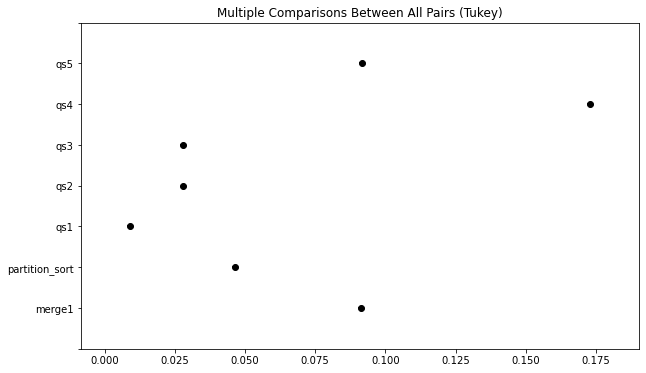

In [25]:
posthoc.plot_simultaneous();